In [1]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('Cleaned_fights', index_col=[0])
df.head()

,R_fighter,B_fighter,date,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,...,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,R_stance,B_stance
0,Henry Cejudo,Marlon Moraes,2019-06-08,1,True,0,5,0.0,4.0,0.0,...,0.0,0.0,8.0,162.56,162.56,135.0,31.0,32.0,0,0
1,Valentina Shevchenko,Jessica Eye,2019-06-08,1,True,11,5,0.0,3.0,0.0,...,2.0,0.0,5.0,165.10,167.64,125.0,32.0,31.0,1,0
2,Tony Ferguson,Donald Cerrone,2019-06-08,1,False,6,3,0.0,3.0,0.0,...,6.0,1.0,14.0,180.34,193.04,155.0,36.0,35.0,0,0
3,Jimmie Rivera,Petr Yan,2019-06-08,0,False,0,3,0.0,4.0,0.0,...,0.0,0.0,6.0,162.56,172.72,135.0,26.0,29.0,0,2
4,Tai Tuivasa,Blagoy Ivanov,2019-06-08,0,False,4,3,0.0,1.0,0.0,...,0.0,0.0,3.0,187.96,190.50,264.0,32.0,26.0,1,1


In [3]:
df["R_fighter"] = df["R_fighter"].astype('category')
df['B_fighter'] = df['B_fighter'].astype('category')
df["R_fighter"] = df["R_fighter"].cat.codes
df['B_fighter'] = df['B_fighter'].cat.codes
df.head()

,R_fighter,B_fighter,date,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,...,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,R_stance,B_stance
0,340,796,2019-06-08,1,True,0,5,0.0,4.0,0.0,...,0.0,0.0,8.0,162.56,162.56,135.0,31.0,32.0,0,0
1,907,559,2019-06-08,1,True,11,5,0.0,3.0,0.0,...,2.0,0.0,5.0,165.10,167.64,125.0,32.0,31.0,1,0
2,894,332,2019-06-08,1,False,6,3,0.0,3.0,0.0,...,6.0,1.0,14.0,180.34,193.04,155.0,36.0,35.0,0,0
3,422,950,2019-06-08,0,False,0,3,0.0,4.0,0.0,...,0.0,0.0,6.0,162.56,172.72,135.0,26.0,29.0,0,2
4,856,117,2019-06-08,0,False,4,3,0.0,1.0,0.0,...,0.0,0.0,3.0,187.96,190.50,264.0,32.0,26.0,1,1


In [4]:
df = df.drop('date', axis=1)
df = df.dropna()

In [5]:
df = df.astype(float)
df.head()

,R_fighter,B_fighter,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,...,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,R_stance,B_stance
0,340.0,796.0,1.0,1.0,0.0,5.0,0.0,4.0,0.0,9.200000,...,0.0,0.0,8.0,162.56,162.56,135.0,31.0,32.0,0.0,0.0
1,907.0,559.0,1.0,1.0,11.0,5.0,0.0,3.0,0.0,14.600000,...,2.0,0.0,5.0,165.10,167.64,125.0,32.0,31.0,1.0,0.0
2,894.0,332.0,1.0,0.0,6.0,3.0,0.0,3.0,0.0,15.354839,...,6.0,1.0,14.0,180.34,193.04,155.0,36.0,35.0,0.0,0.0
3,422.0,950.0,0.0,0.0,0.0,3.0,0.0,4.0,0.0,17.000000,...,0.0,0.0,6.0,162.56,172.72,135.0,26.0,29.0,0.0,2.0
4,856.0,117.0,0.0,0.0,4.0,3.0,0.0,1.0,0.0,17.000000,...,0.0,0.0,3.0,187.96,190.50,264.0,32.0,26.0,1.0,1.0


In [6]:
df.info(float)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3496 entries, 0 to 3495
Data columns (total 142 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   R_fighter                     float64
 1   B_fighter                     float64
 2   Winner                        float64
 3   title_bout                    float64
 4   weight_class                  float64
 5   no_of_rounds                  float64
 6   B_current_lose_streak         float64
 7   B_current_win_streak          float64
 8   B_draw                        float64
 9   B_avg_BODY_att                float64
 10  B_avg_BODY_landed             float64
 11  B_avg_CLINCH_att              float64
 12  B_avg_CLINCH_landed           float64
 13  B_avg_DISTANCE_att            float64
 14  B_avg_DISTANCE_landed         float64
 15  B_avg_GROUND_att              float64
 16  B_avg_GROUND_landed           float64
 17  B_avg_HEAD_att                float64
 18  B_avg_HEAD_landed          

In [7]:
null_values = df.isnull().sum()
pd.set_option('display.max_rows', null_values.shape[0]+1)

null_values

R_fighter                       0
B_fighter                       0
Winner                          0
title_bout                      0
weight_class                    0
no_of_rounds                    0
B_current_lose_streak           0
B_current_win_streak            0
B_draw                          0
B_avg_BODY_att                  0
B_avg_BODY_landed               0
B_avg_CLINCH_att                0
B_avg_CLINCH_landed             0
B_avg_DISTANCE_att              0
B_avg_DISTANCE_landed           0
B_avg_GROUND_att                0
B_avg_GROUND_landed             0
B_avg_HEAD_att                  0
B_avg_HEAD_landed               0
B_avg_KD                        0
B_avg_LEG_att                   0
B_avg_LEG_landed                0
B_avg_PASS                      0
B_avg_REV                       0
B_avg_SIG_STR_att               0
B_avg_SIG_STR_landed            0
B_avg_SIG_STR_pct               0
B_avg_SUB_ATT                   0
B_avg_TD_att                    0
B_avg_TD_lande

In [9]:
properties = list(df.columns.values)
properties.remove('Winner')
X = df[properties]
y = df['Winner']

In [10]:
neg, pos = np.bincount(df['Winner'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 3496
    Positive: 2284 (65.33% of total)



In [11]:
train_df, test_df = train_test_split(df, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

train_labels = train_df.pop('Winner')
bool_train_labels = train_labels != 0
val_labels = val_df.pop('Winner')
test_labels = test_df.pop('Winner')

train_features = train_df
val_features = val_df
test_features = test_df

In [12]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)



print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)


Training labels shape: (2236,)
Validation labels shape: (560,)
Test labels shape: (700,)
Training features shape: (2236, 141)
Validation features shape: (560, 141)
Test features shape: (700, 141)


In [13]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          600, activation='relu',
          input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(lr=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [14]:
EPOCHS = 50
BATCH_SIZE = 15

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=2,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [15]:
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 600)               85200     
_________________________________________________________________
dropout (Dropout)            (None, 600)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 601       
Total params: 85,801
Trainable params: 85,801
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.predict(train_features[:10])

array([[0.18948987],
       [0.43903014],
       [0.27294403],
       [0.207937  ],
       [0.17605835],
       [0.30681327],
       [0.17242864],
       [0.165892  ],
       [0.22290674],
       [0.22924235]], dtype=float32)

In [17]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 1.1034


In [18]:
initial_bias = np.log([pos/neg])
initial_bias

array([0.6336564])

In [19]:
model = make_model(output_bias=initial_bias)
model.predict(train_features[:10])

array([[0.6974274 ],
       [0.7342634 ],
       [0.30369267],
       [0.671134  ],
       [0.6841737 ],
       [0.4561154 ],
       [0.35234016],
       [0.57389253],
       [0.5518837 ],
       [0.63837004]], dtype=float32)

In [20]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.6994


In [21]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

In [22]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=2)

Epoch 1/20
150/150 - 1s - loss: 0.6797 - tp: 2235.0000 - fp: 1133.0000 - tn: 1213.0000 - fn: 2127.0000 - accuracy: 0.5140 - precision: 0.6636 - recall: 0.5124 - auc: 0.5270 - val_loss: 0.6105 - val_tp: 293.0000 - val_fp: 110.0000 - val_tn: 72.0000 - val_fn: 85.0000 - val_accuracy: 0.6518 - val_precision: 0.7270 - val_recall: 0.7751 - val_auc: 0.6575
Epoch 2/20
150/150 - 0s - loss: 0.5914 - tp: 1174.0000 - fp: 420.0000 - tn: 362.0000 - fn: 280.0000 - accuracy: 0.6869 - precision: 0.7365 - recall: 0.8074 - auc: 0.7153 - val_loss: 0.6042 - val_tp: 331.0000 - val_fp: 127.0000 - val_tn: 55.0000 - val_fn: 47.0000 - val_accuracy: 0.6893 - val_precision: 0.7227 - val_recall: 0.8757 - val_auc: 0.6827
Epoch 3/20
150/150 - 0s - loss: 0.5754 - tp: 1218.0000 - fp: 437.0000 - tn: 345.0000 - fn: 236.0000 - accuracy: 0.6990 - precision: 0.7360 - recall: 0.8377 - auc: 0.7352 - val_loss: 0.6126 - val_tp: 311.0000 - val_fp: 128.0000 - val_tn: 54.0000 - val_fn: 67.0000 - val_accuracy: 0.6518 - val_precisi

In [23]:
def plot_loss(history, label, n):
  # Use a log scale to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color='red', label='Train '+label)
  plt.semilogy(history.epoch, history.history['val_loss'],
          color='blue', label='Val '+label,
          linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  
  plt.legend()

NameError: name 'careful_bias_history' is not defined

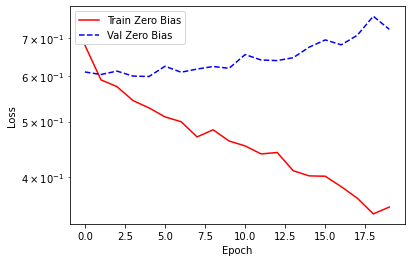

In [24]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [25]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/50
150/150 [==============================] - 1s 5ms/step - loss: 0.6862 - tp: 1494.0000 - fp: 638.0000 - tn: 326.0000 - fn: 338.0000 - accuracy: 0.6509 - precision: 0.7008 - recall: 0.8155 - auc: 0.6188 - val_loss: 0.5790 - val_tp: 340.0000 - val_fp: 134.0000 - val_tn: 48.0000 - val_fn: 38.0000 - val_accuracy: 0.6929 - val_precision: 0.7173 - val_recall: 0.8995 - val_auc: 0.6958
Epoch 2/50
150/150 [==============================] - 0s 2ms/step - loss: 0.5946 - tp: 1208.0000 - fp: 445.0000 - tn: 337.0000 - fn: 246.0000 - accuracy: 0.6910 - precision: 0.7308 - recall: 0.8308 - auc: 0.7083 - val_loss: 0.5971 - val_tp: 328.0000 - val_fp: 133.0000 - val_tn: 49.0000 - val_fn: 50.0000 - val_accuracy: 0.6732 - val_precision: 0.7115 - val_recall: 0.8677 - val_auc: 0.6704
Epoch 3/50
150/150 [==============================] - 0s 1ms/step - loss: 0.5717 - tp: 1231.0000 - fp: 436.0000 - tn: 346.0000 - fn: 223.0000 - accuracy: 0.7053 - precision: 0.7385 - recall: 0.8466 - auc: 0.7383 - val_

In [26]:
def plot_metrics(history):
  metrics = ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color='red', label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color='blue', linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()


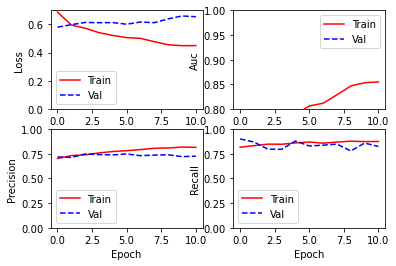

In [27]:
plot_metrics(baseline_history)

In [28]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)

In [39]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print(' (True Negatives): ', cm[0][0])
  print(' (False Positives): ', cm[0][1])
  print('(False Negatives): ', cm[1][0])
  print('(True Positives): ', cm[1][1])
  print('Total: ', np.sum(cm[1]))

loss :  0.6098156571388245
tp :  400.0
fp :  187.0
tn :  61.0
fn :  52.0
accuracy :  0.6585714221000671
precision :  0.681430995464325
recall :  0.8849557638168335
auc :  0.6827362179756165

 (True Negatives):  61
 (False Positives):  187
(False Negatives):  52
(True Positives):  400
Total:  452


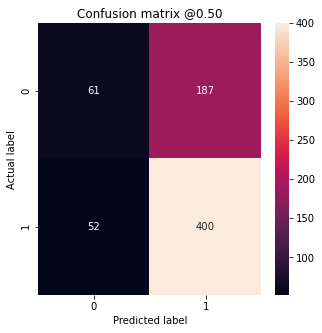

In [59]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)
plt.savefig('good_matrix_ufc')

In [41]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,50])
  plt.ylim([0,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

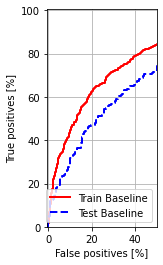

In [42]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color='red')
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color='blue', linestyle='--')
plt.legend(loc='lower right')

In [43]:
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 1.44
Weight for class 1: 0.77


In [44]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight) 

Epoch 1/50
150/150 [==============================] - 1s 5ms/step - loss: 0.7656 - tp: 1250.0000 - fp: 537.0000 - tn: 493.0000 - fn: 656.0000 - accuracy: 0.5937 - precision: 0.6995 - recall: 0.6558 - auc: 0.5986 - val_loss: 0.6213 - val_tp: 239.0000 - val_fp: 65.0000 - val_tn: 117.0000 - val_fn: 139.0000 - val_accuracy: 0.6357 - val_precision: 0.7862 - val_recall: 0.6323 - val_auc: 0.6952
Epoch 2/50
150/150 [==============================] - 0s 2ms/step - loss: 0.6439 - tp: 937.0000 - fp: 275.0000 - tn: 507.0000 - fn: 517.0000 - accuracy: 0.6458 - precision: 0.7731 - recall: 0.6444 - auc: 0.7016 - val_loss: 0.6340 - val_tp: 245.0000 - val_fp: 78.0000 - val_tn: 104.0000 - val_fn: 133.0000 - val_accuracy: 0.6232 - val_precision: 0.7585 - val_recall: 0.6481 - val_auc: 0.6729
Epoch 3/50
150/150 [==============================] - 0s 2ms/step - loss: 0.6180 - tp: 951.0000 - fp: 255.0000 - tn: 527.0000 - fn: 503.0000 - accuracy: 0.6610 - precision: 0.7886 - recall: 0.6541 - auc: 0.7318 - val_

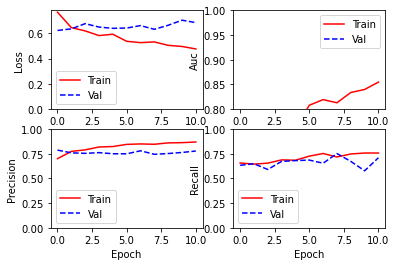

In [45]:
plot_metrics(weighted_history)

In [46]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.6355982422828674
tp :  280.0
fp :  89.0
tn :  159.0
fn :  172.0
accuracy :  0.6271428465843201
precision :  0.7588075995445251
recall :  0.6194690465927124
auc :  0.6923753023147583

 (True Negatives):  159
 (False Positives):  89
(False Negatives):  172
(True Positives):  280
Total:  452


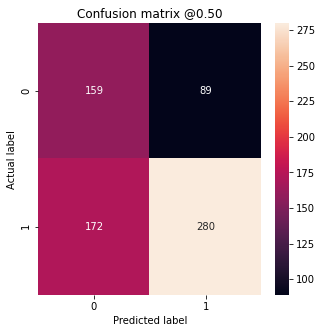

In [60]:
weighted_results = weighted_model.evaluate(test_features, test_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_weighted)
plt.savefig('worse_matrix_ufc')

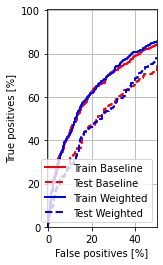

In [48]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color='red')
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color='red', linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color='blue')
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color='blue', linestyle='--')


plt.legend(loc='lower right')

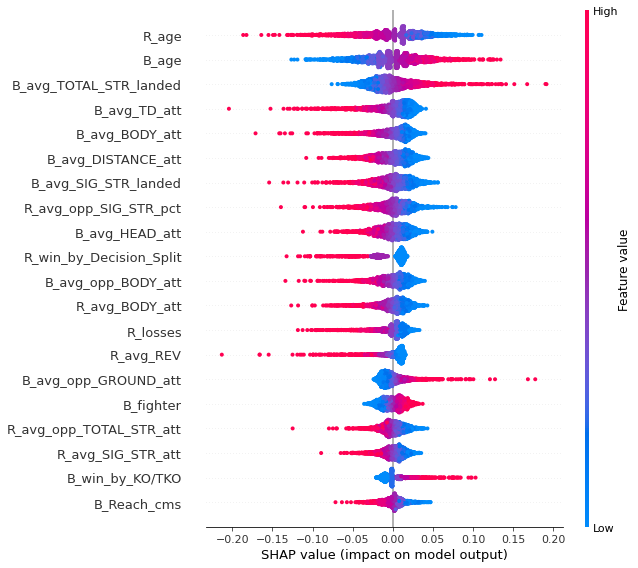

<Figure size 432x288 with 0 Axes>

In [58]:
import shap
explainer = shap.DeepExplainer(model, train_features)
shap_values = explainer.shap_values(train_features)
shap.summary_plot(shap_values[0], train_df)
plt.savefig('shap_summaryplot_ufc')

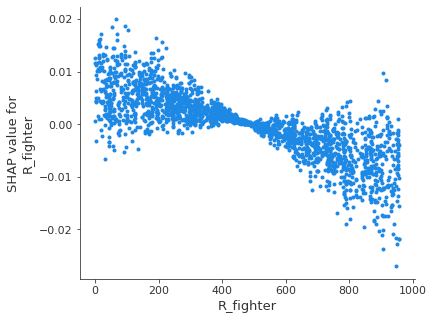

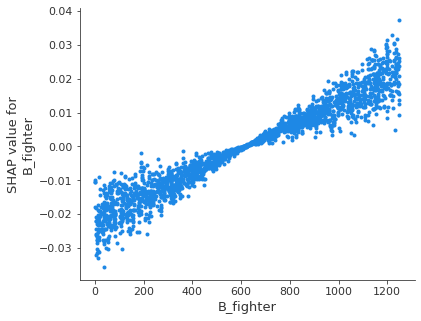

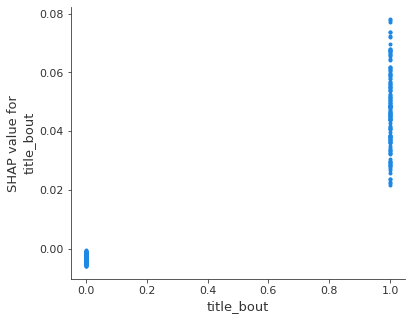

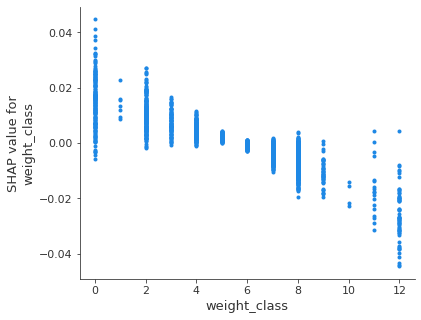

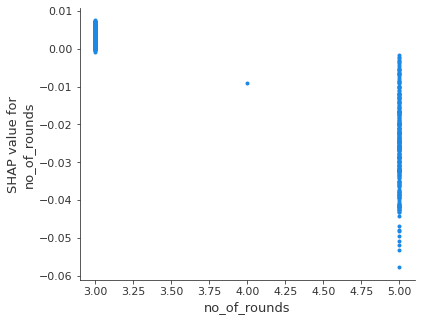

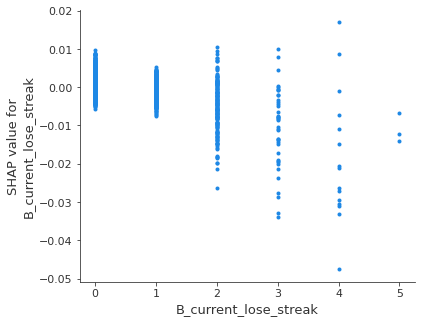

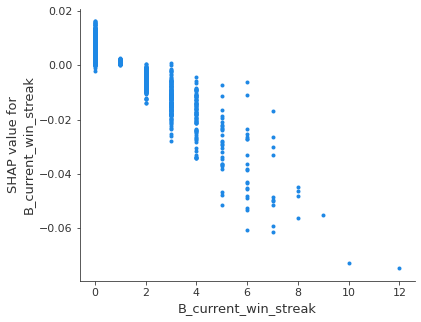

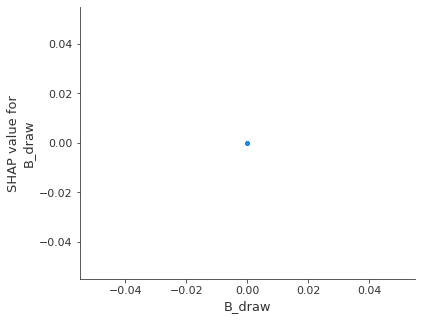

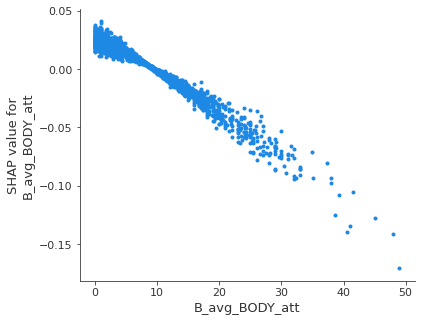

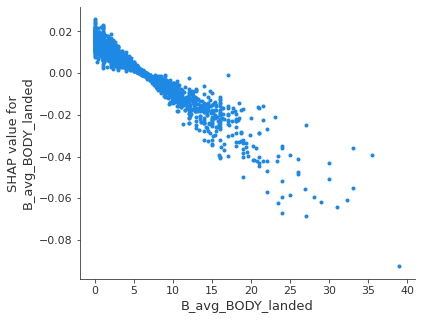

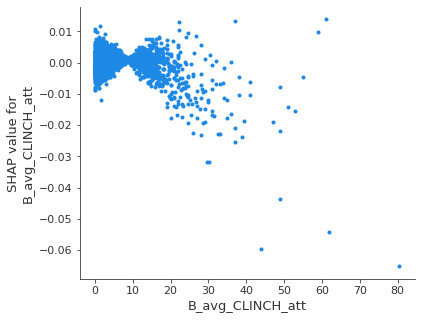

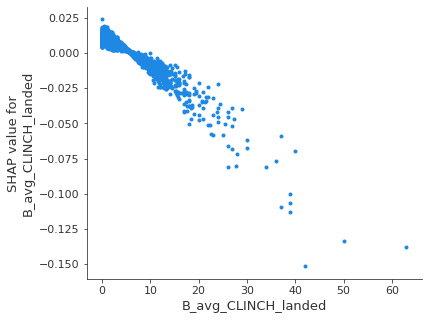

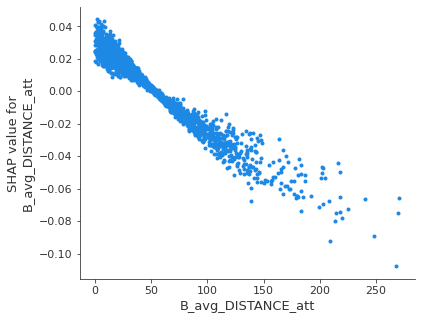

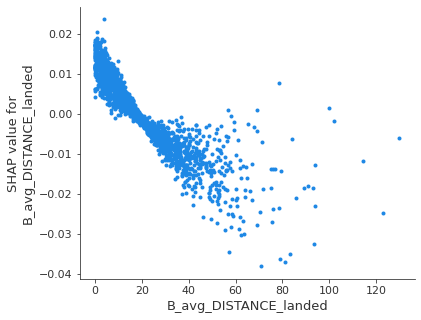

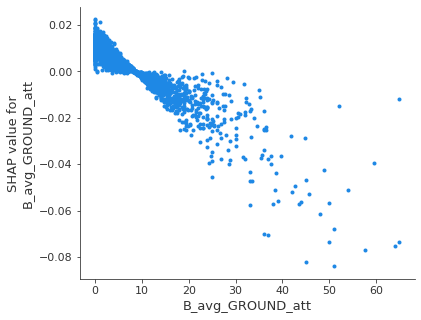

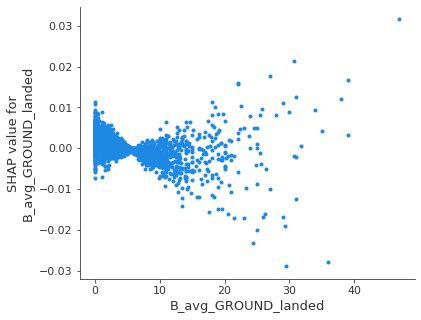

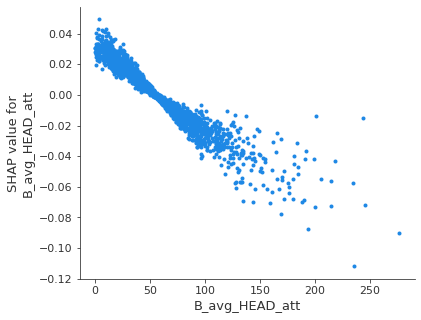

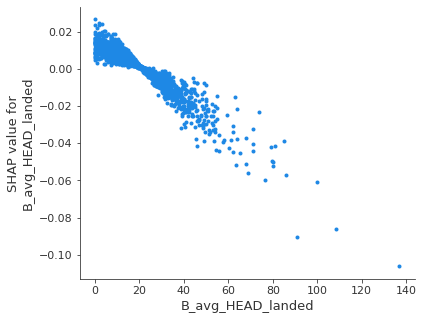

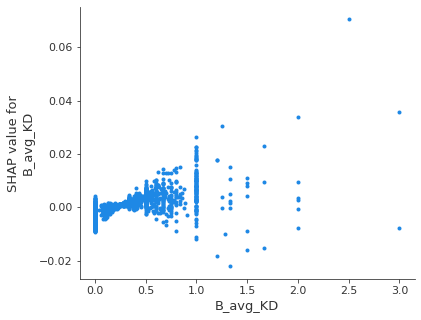

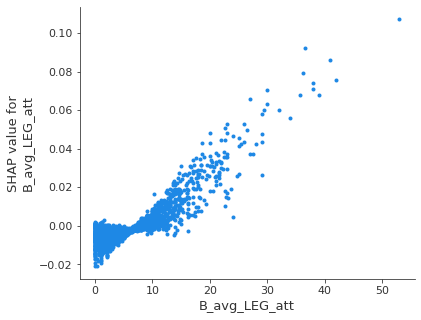

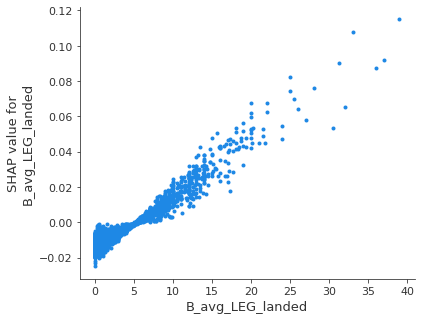

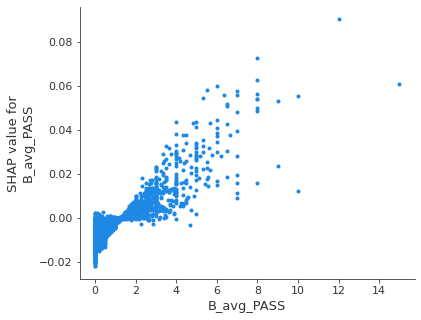

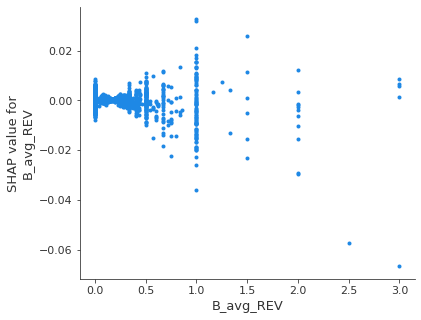

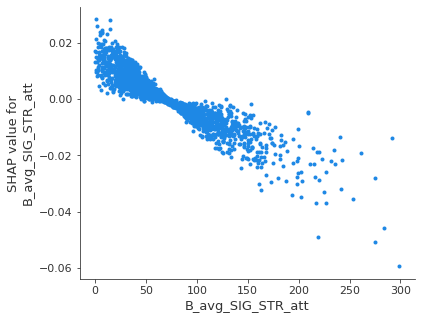

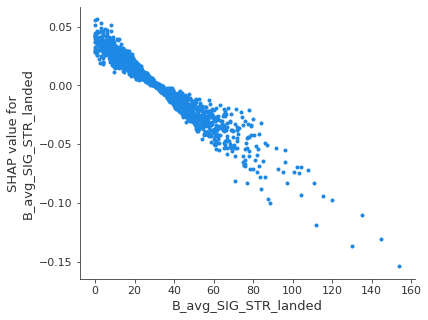

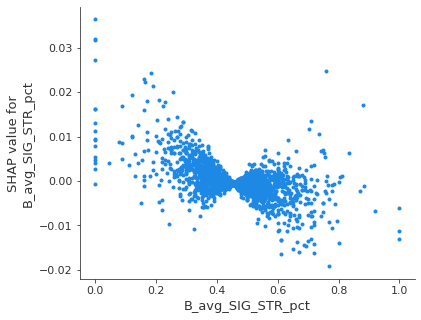

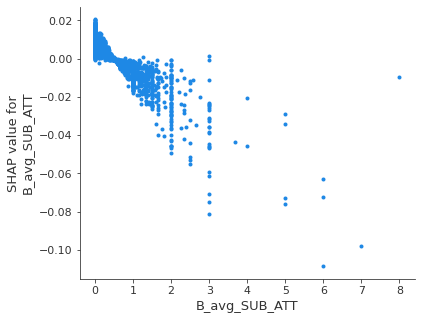

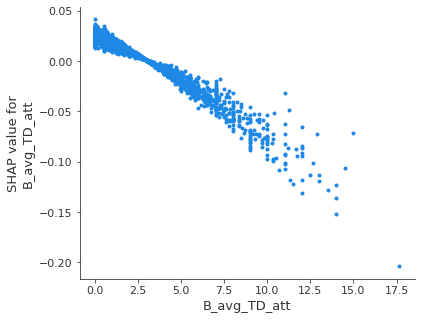

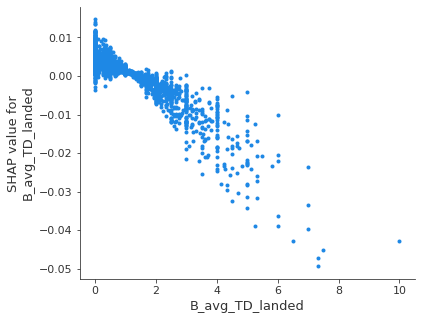

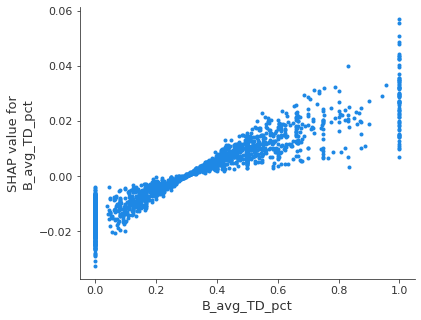

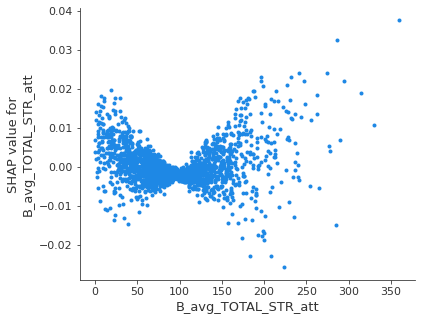

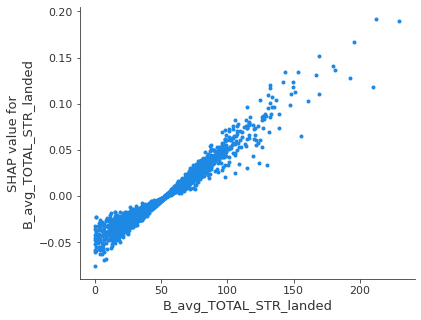

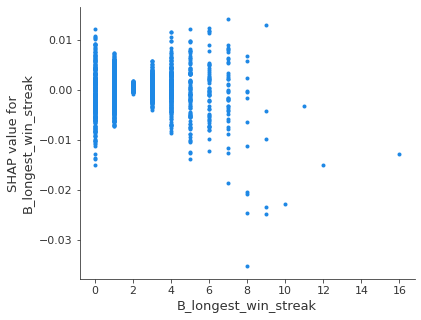

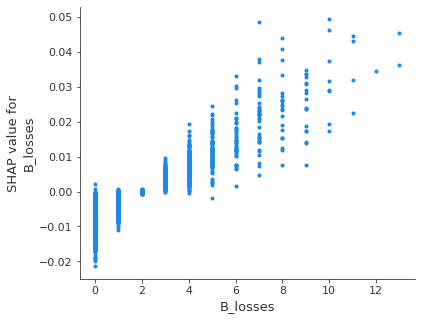

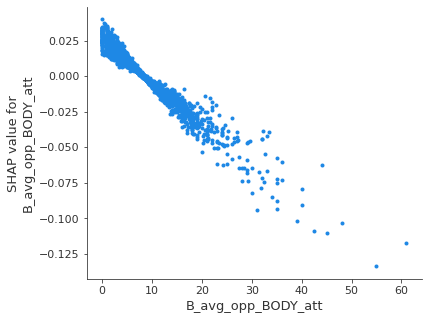

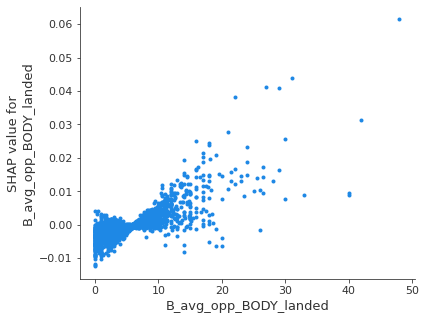

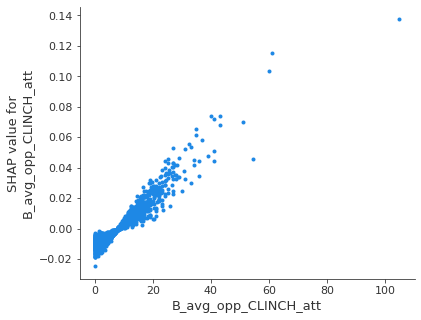

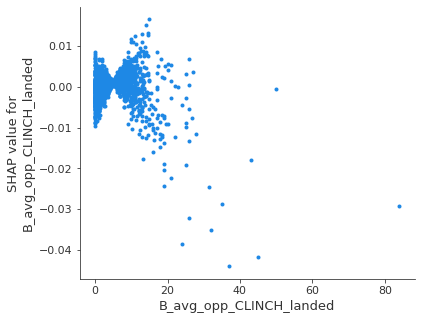

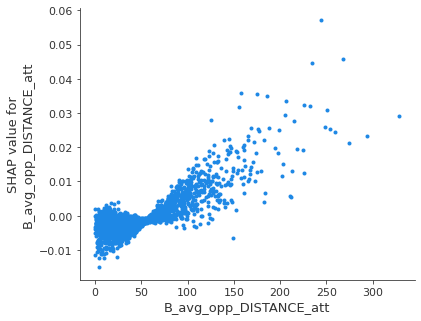

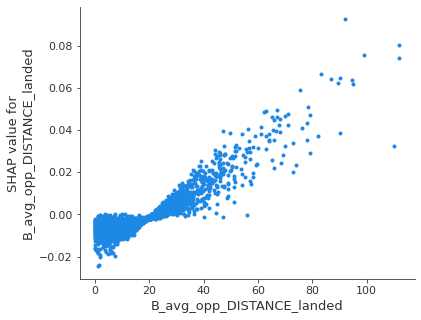

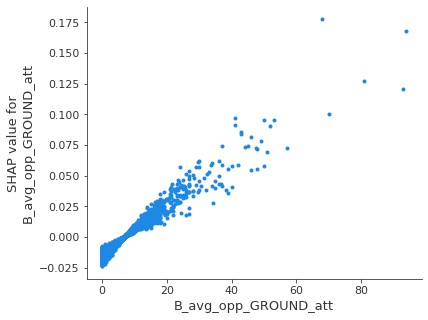

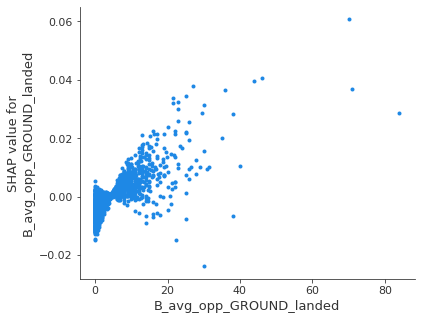

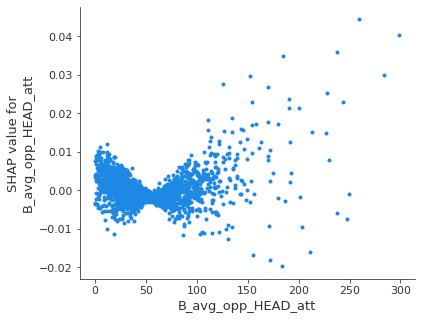

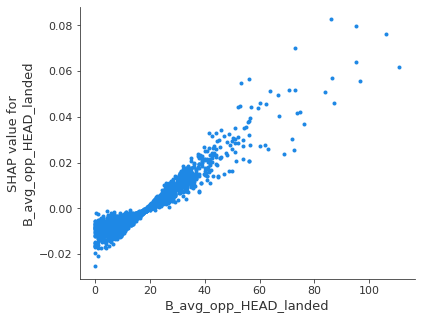

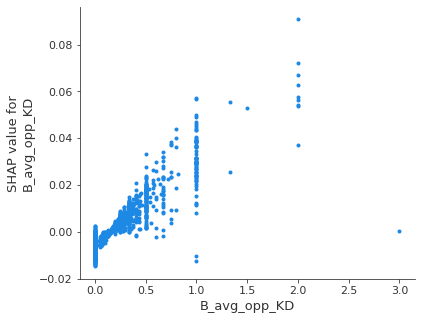

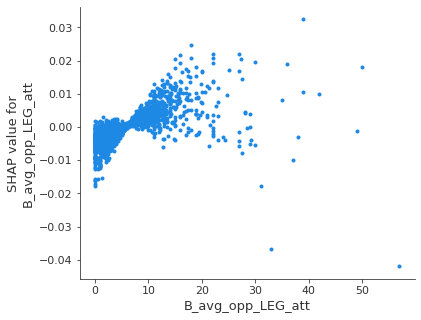

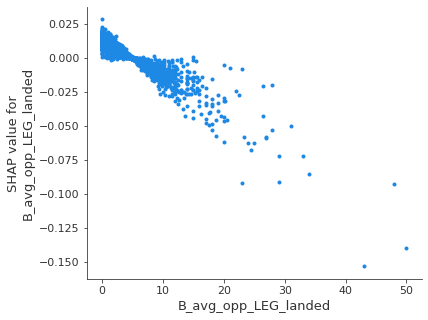

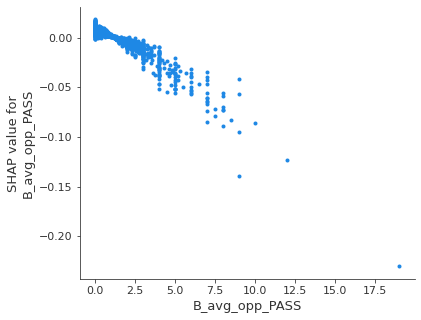

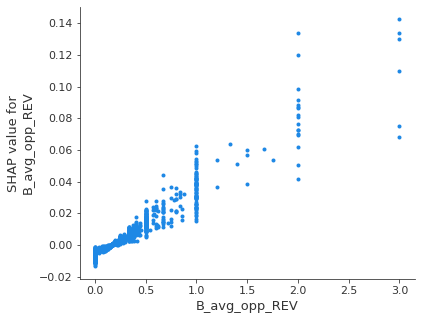

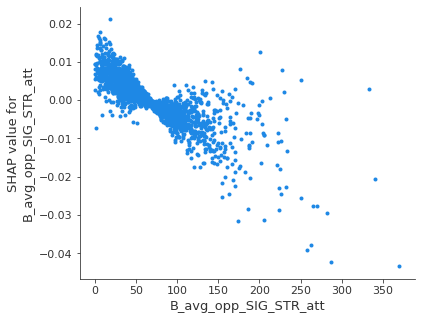

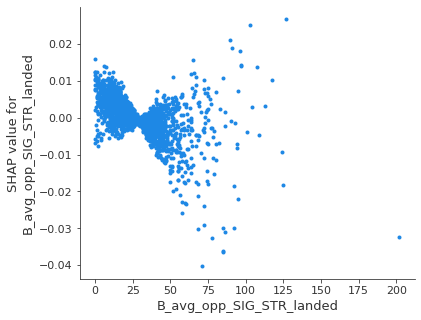

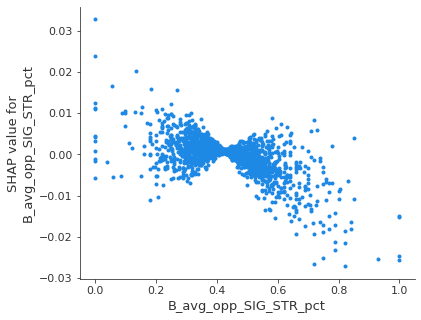

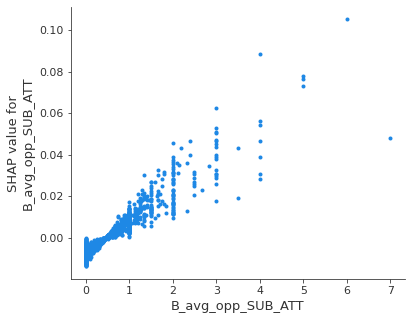

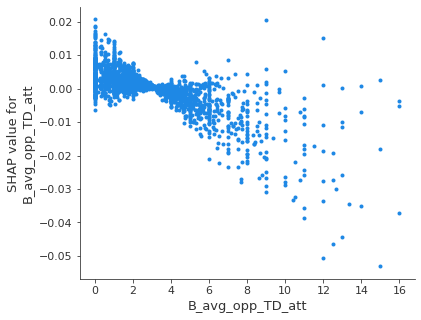

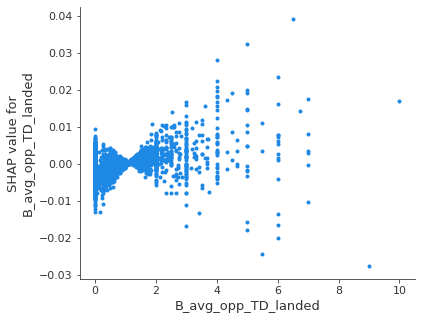

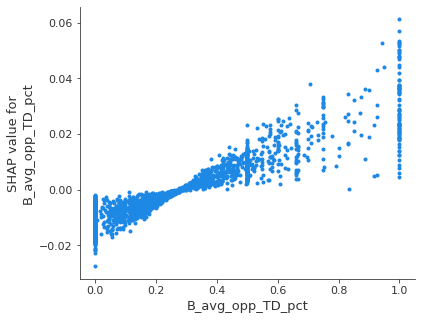

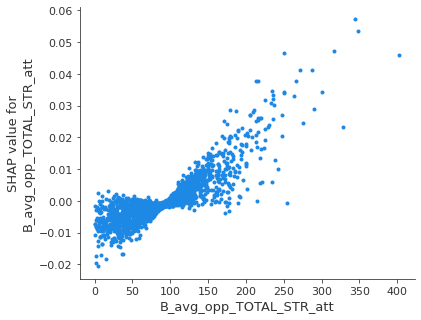

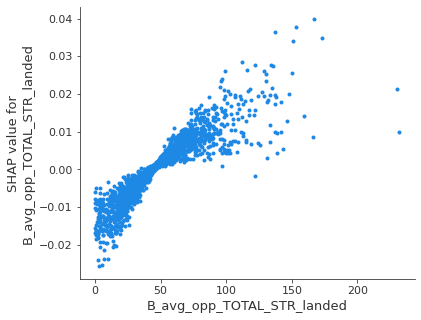

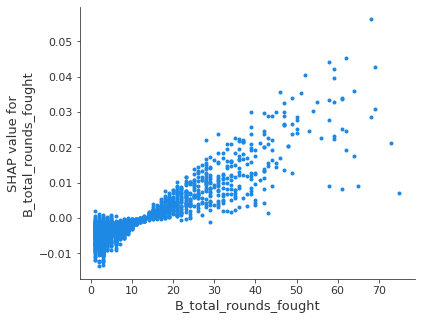

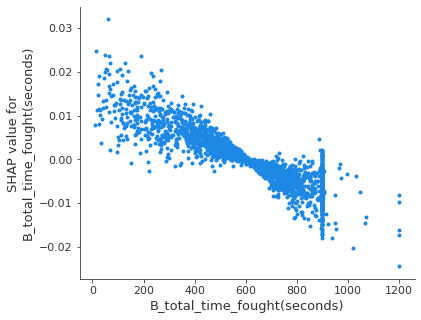

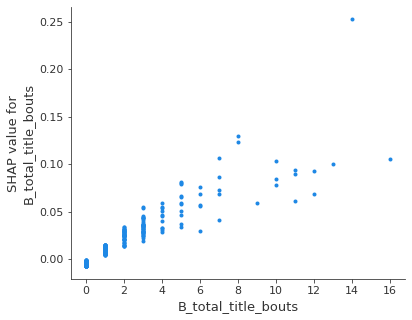

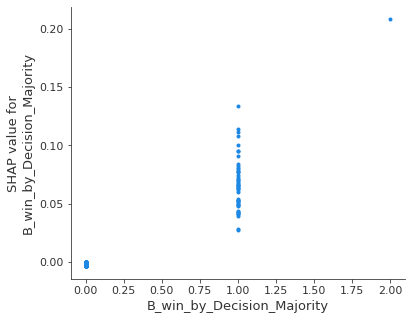

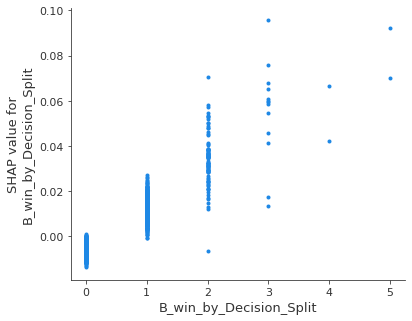

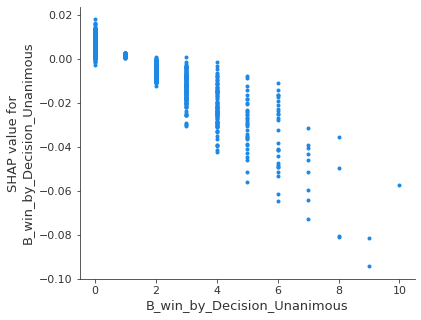

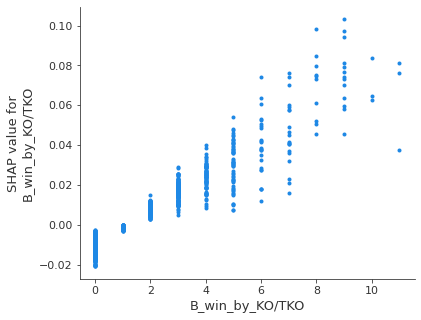

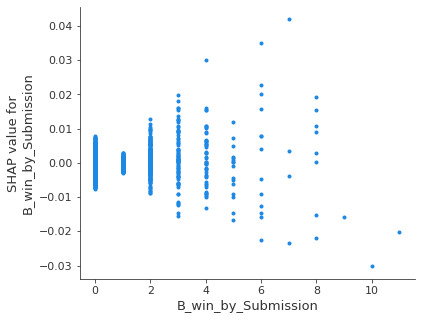

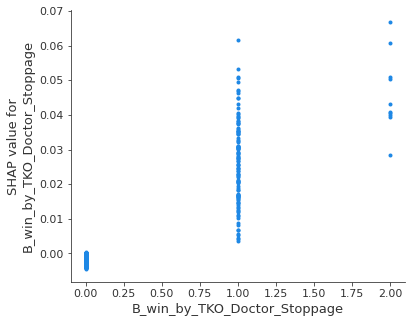

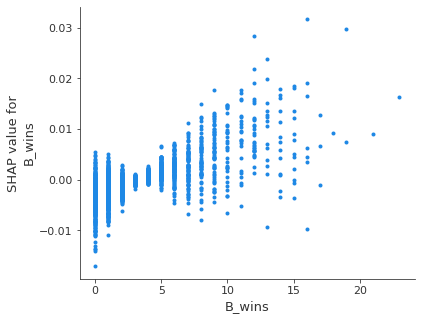

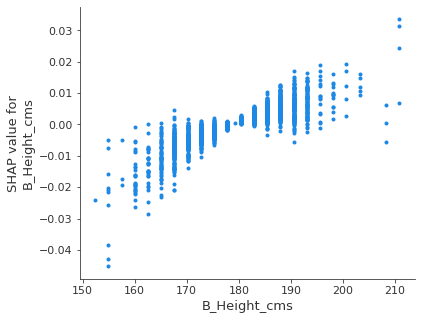

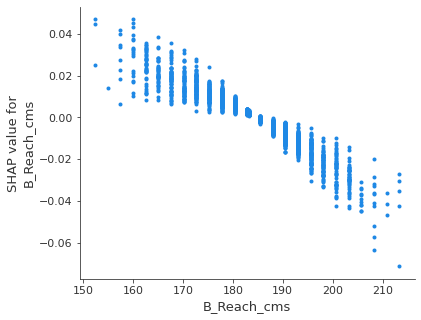

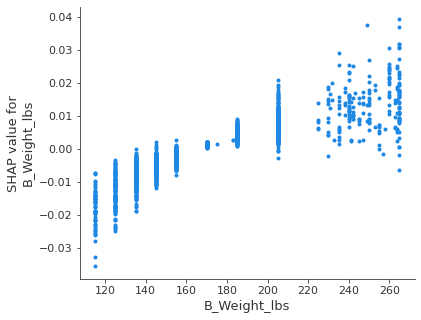

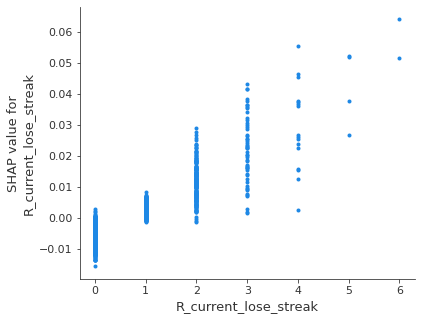

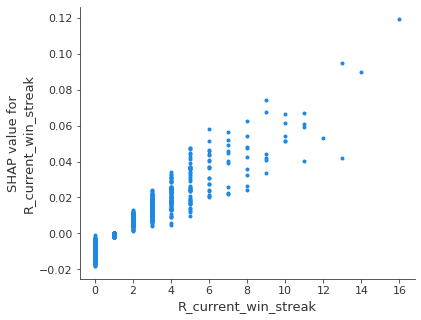

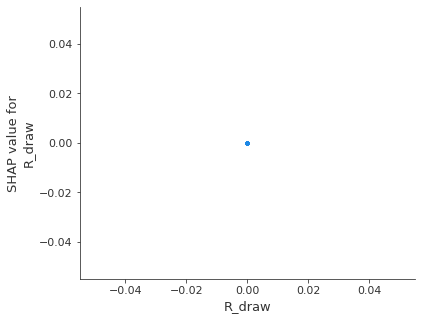

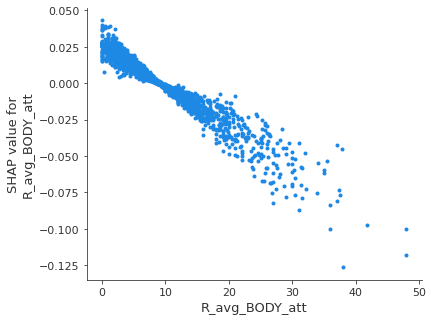

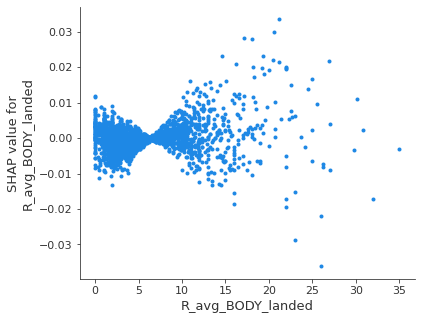

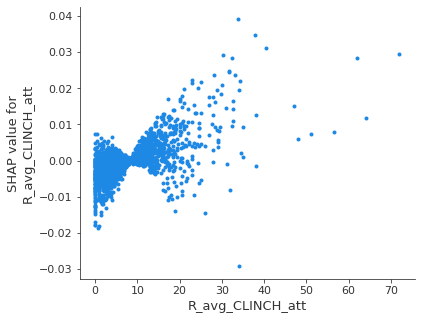

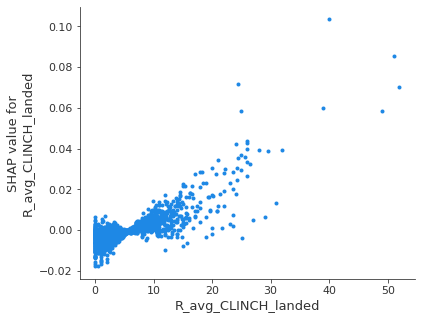

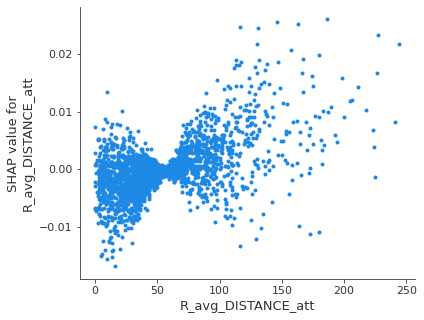

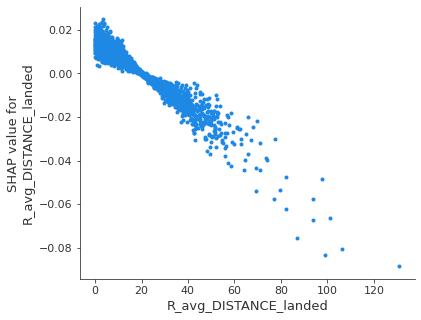

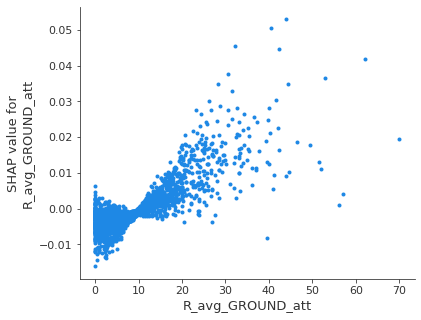

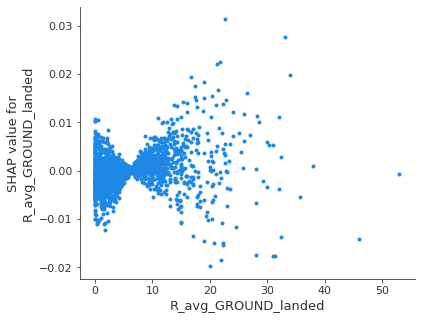

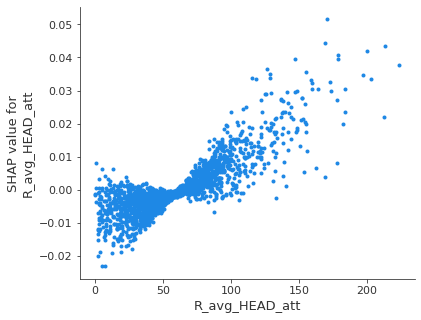

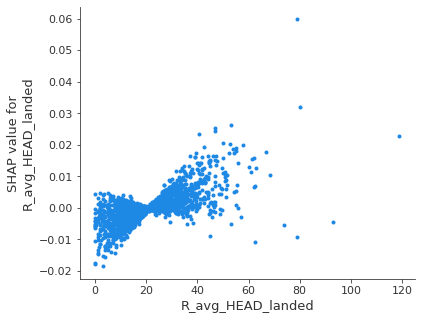

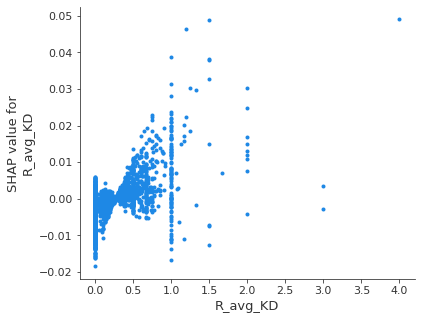

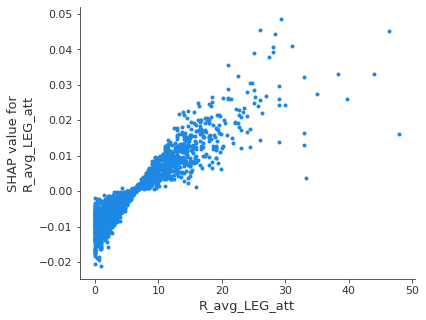

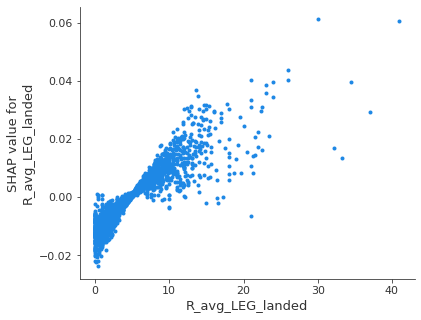

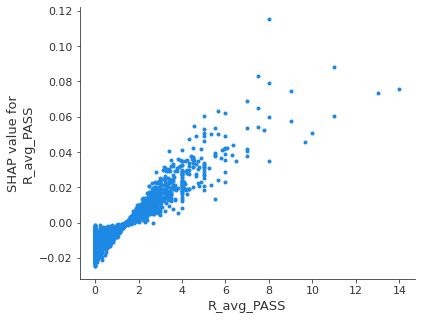

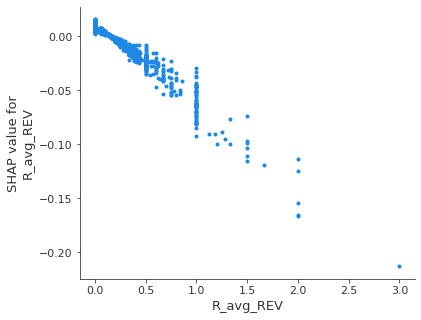

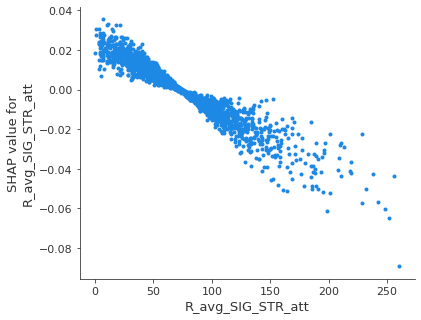

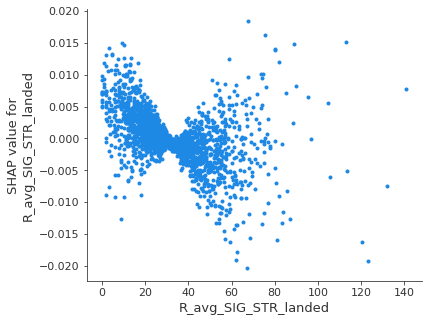

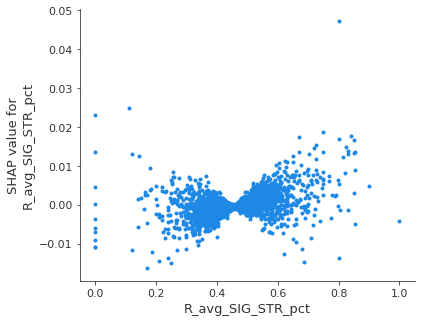

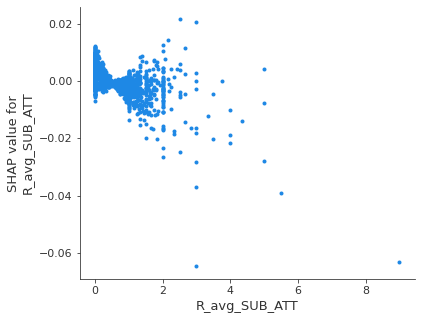

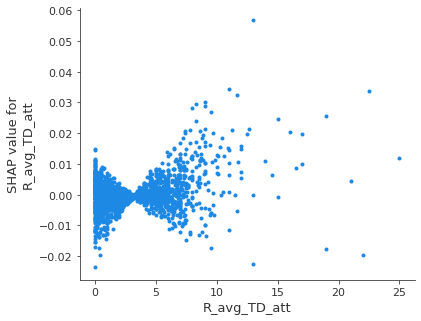

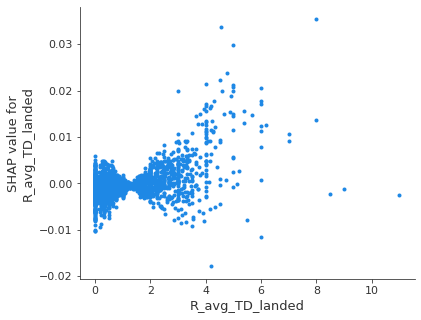

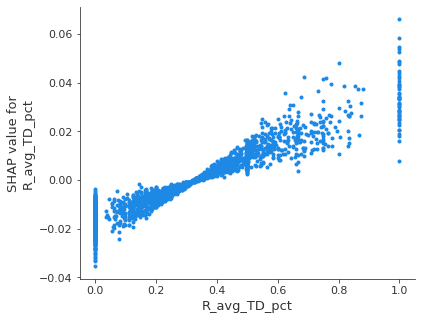

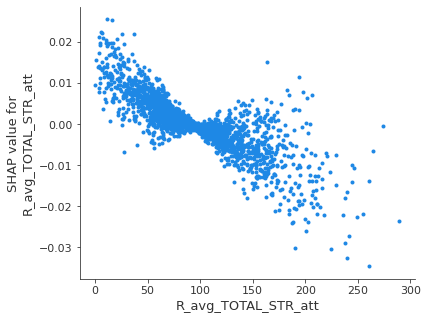

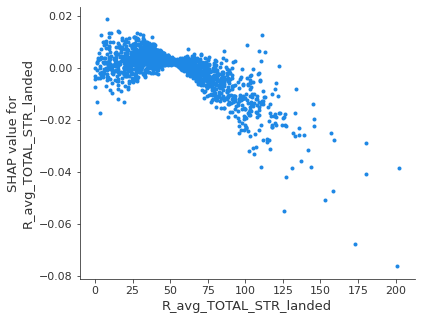

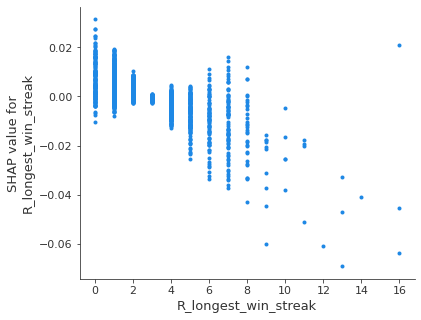

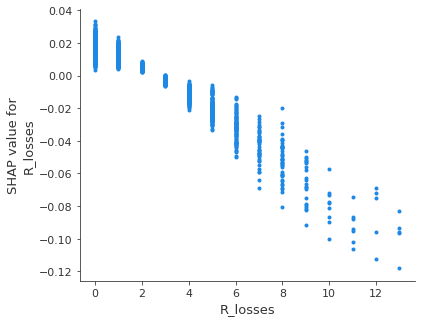

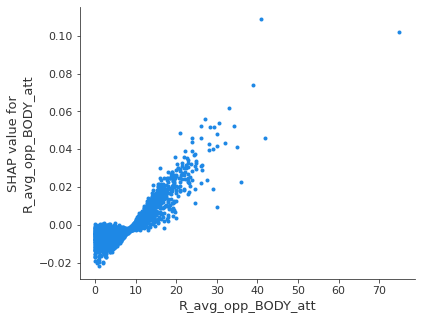

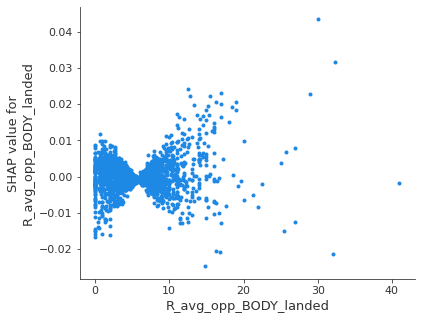

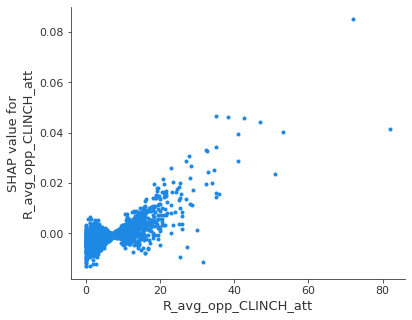

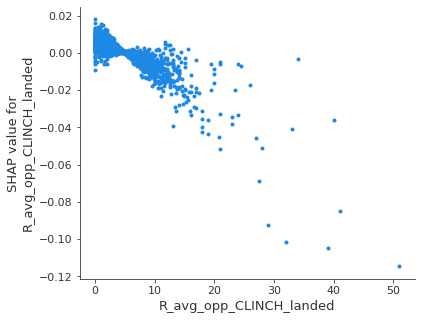

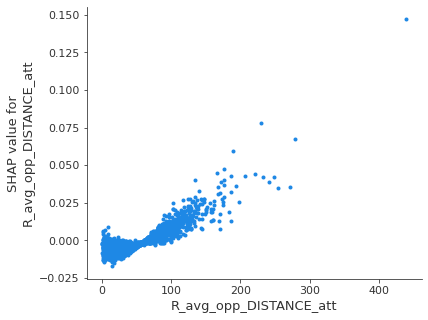

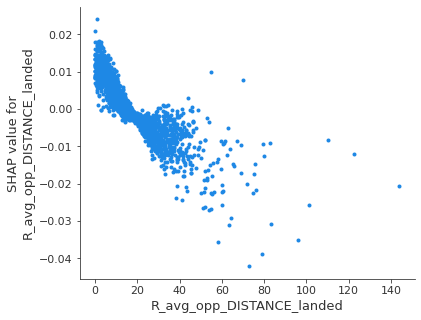

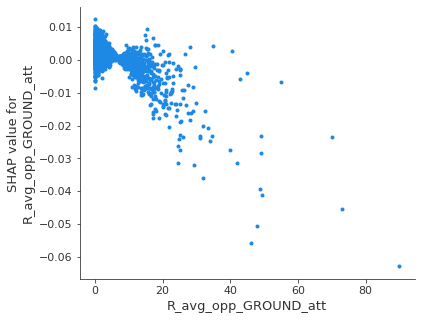

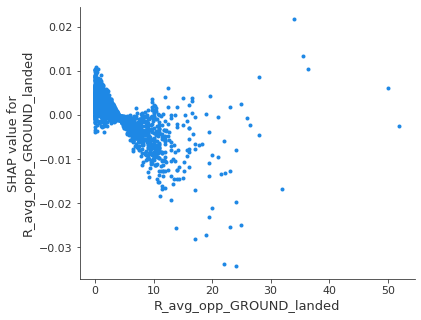

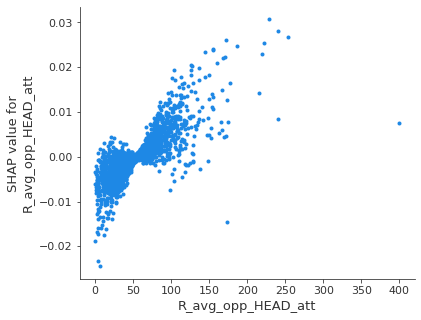

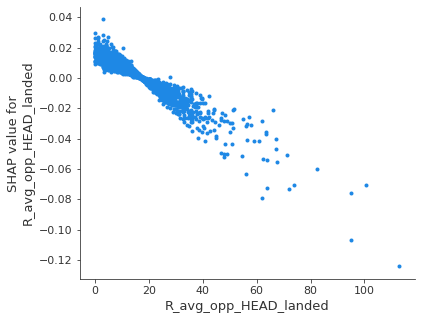

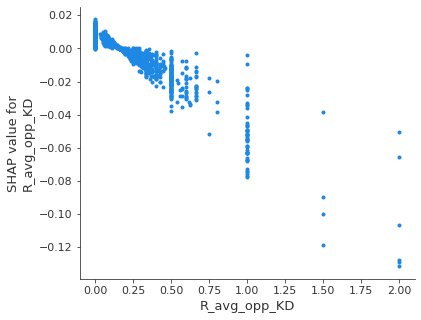

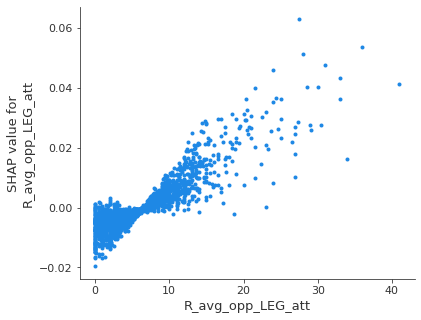

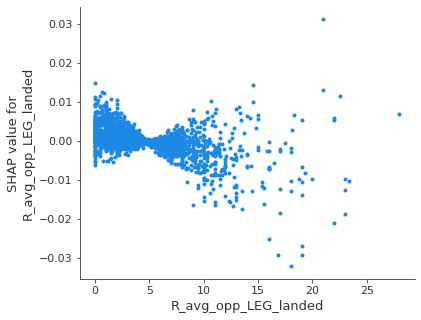

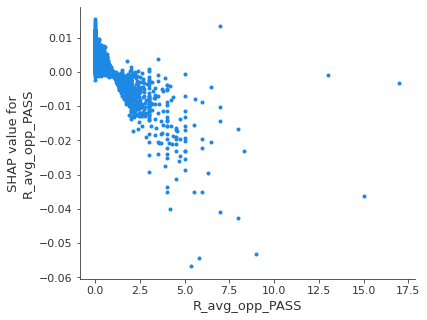

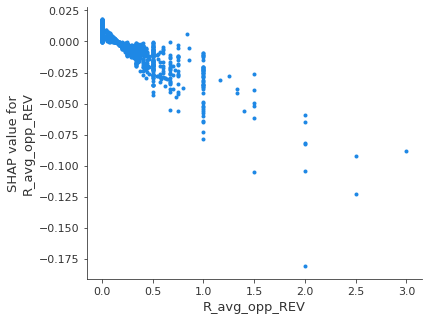

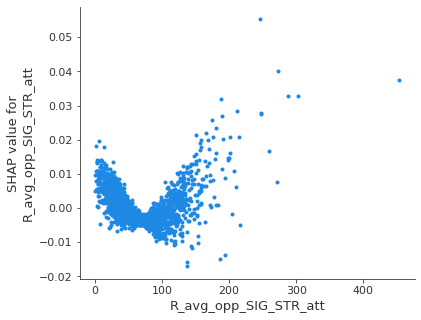

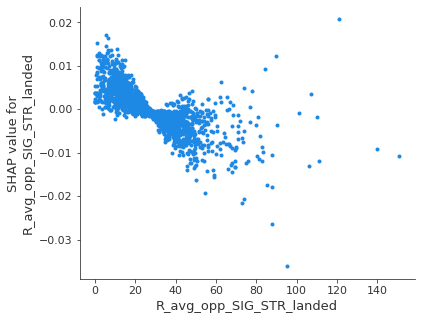

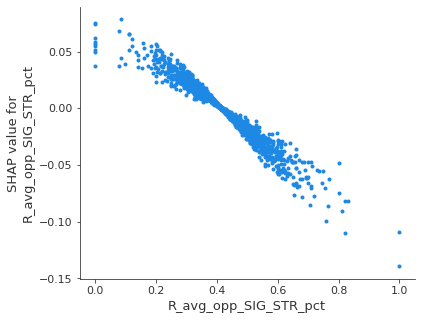

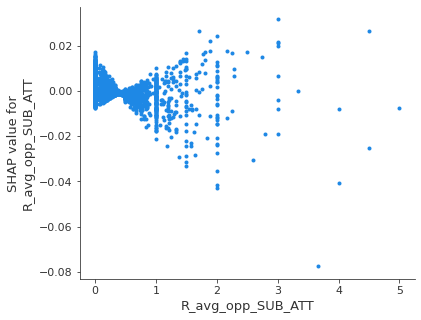

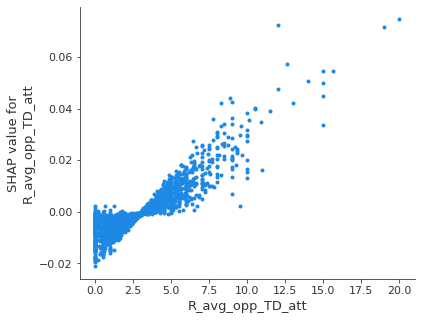

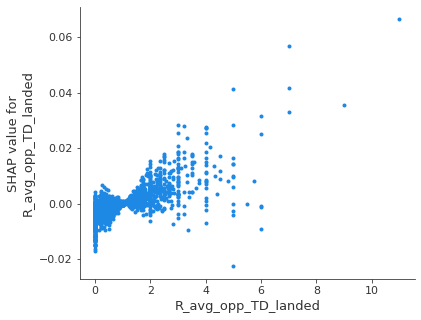

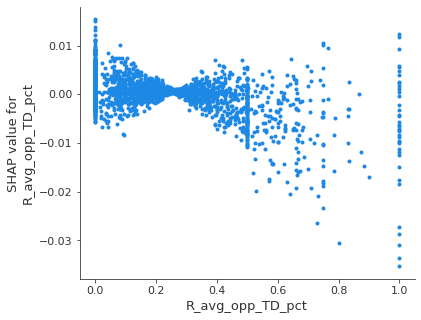

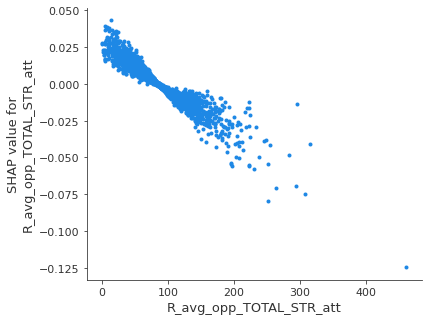

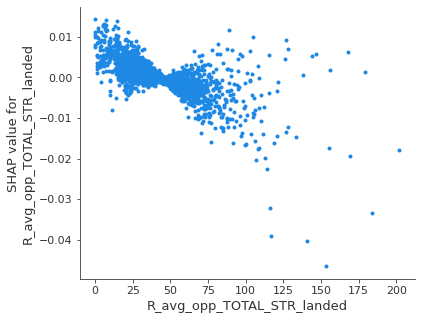

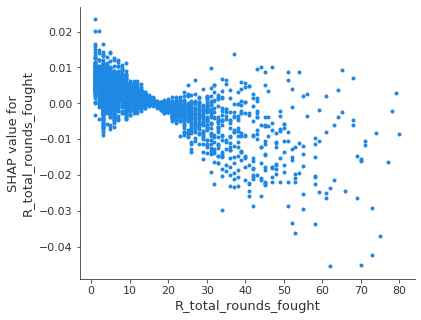

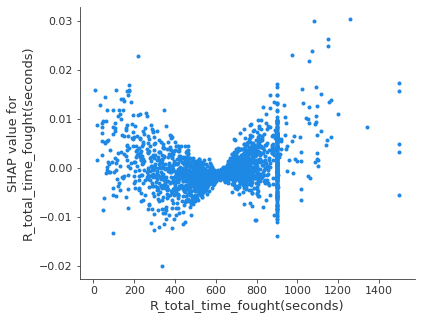

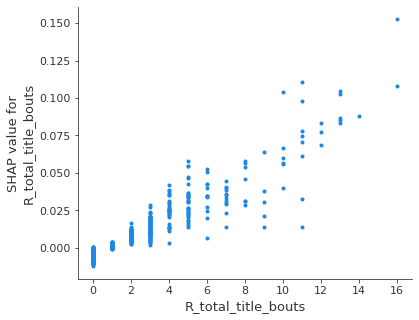

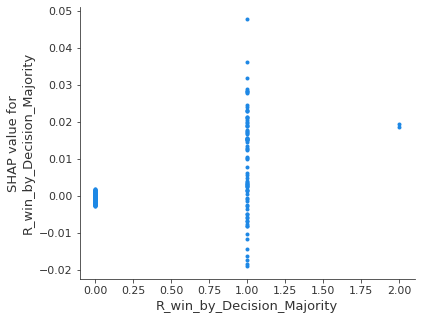

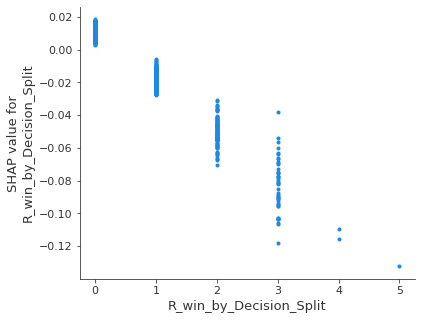

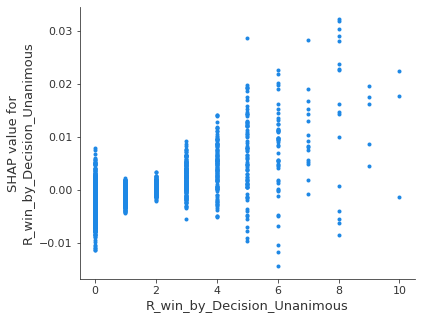

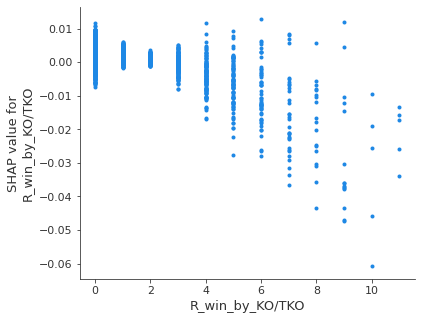

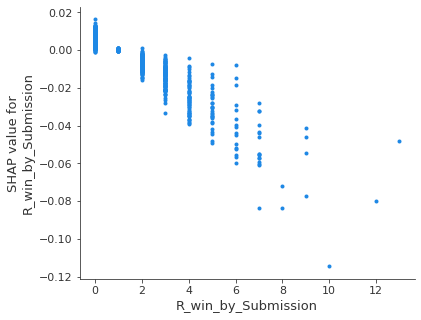

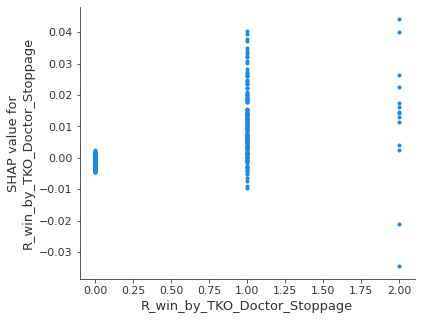

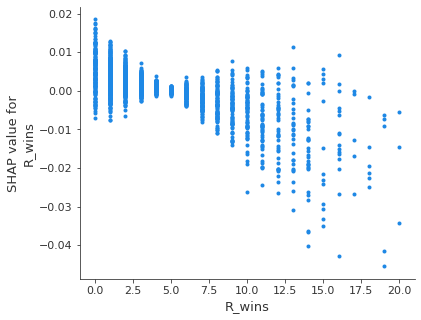

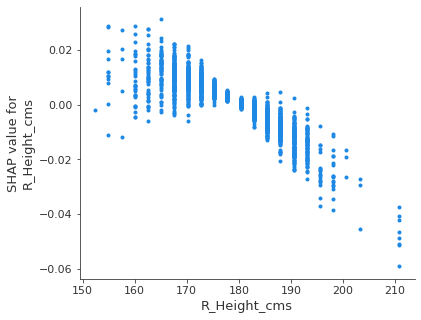

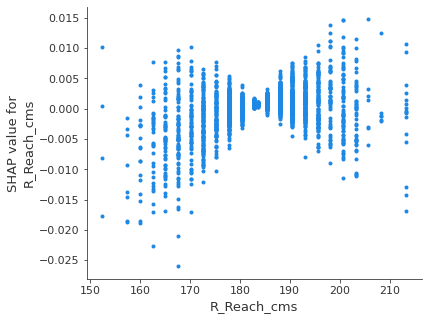

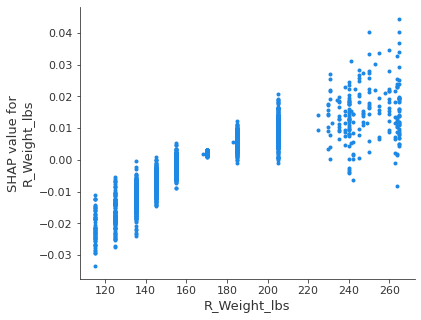

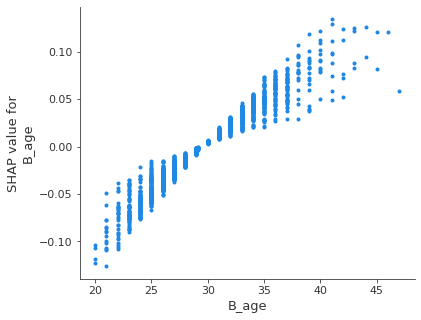

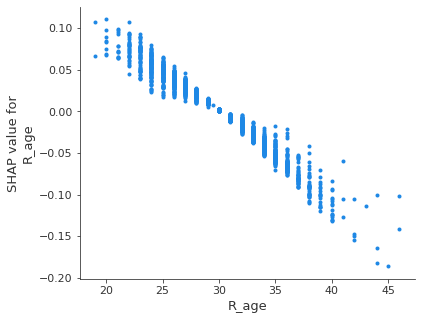

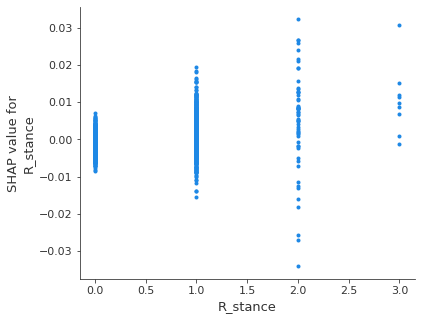

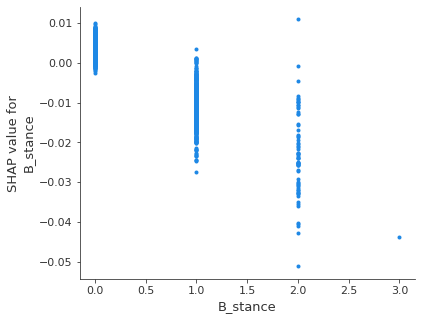

In [52]:
for name in train_df.columns:
    shap.dependence_plot(name, shap_values[0], train_df.iloc[:4900,:],interaction_index=None)

In [56]:
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)


Confusion matrix: 
 [[  6 242]
 [  6 446]]

Classification report: 
               precision    recall  f1-score   support

         0.0       0.50      0.00      0.01       248
         1.0       0.65      1.00      0.78       452

    accuracy                           0.65       700
   macro avg       0.57      0.50      0.40       700
weighted avg       0.59      0.65      0.51       700



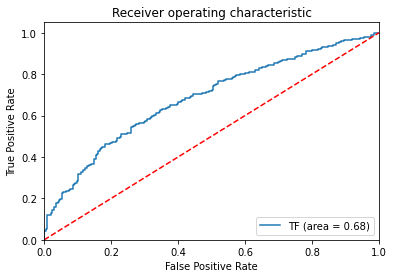

In [57]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression

cm = confusion_matrix(test_labels, test_predictions_baseline> 0.25)
print('\nConfusion matrix: \n',cm)

print('\nClassification report: \n',classification_report(test_labels, test_predictions_baseline> 0.15 ))

logit_roc_auc = roc_auc_score(test_labels, test_predictions_baseline)
fpr, tpr, thresholds = roc_curve(test_labels, test_predictions_baseline)

plt.figure()
plt.plot(fpr, tpr, label='TF (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()